<a href="https://colab.research.google.com/github/Rishabh-Sharma-IITG/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')
import seaborn as sns

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1865,70122,Female,29.0,0,0,Yes,Private,Rural,72.52,33.9,never smoked,0
210,33943,Female,39.0,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
3745,41917,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,0
922,45893,Female,8.0,0,0,No,children,Urban,106.51,12.3,Unknown,0
4542,32126,Female,56.0,0,1,Yes,Private,Urban,91.89,23.3,smokes,0
3558,15824,Female,67.0,0,0,Yes,Private,Rural,81.68,30.4,never smoked,0
4789,5581,Female,39.0,0,0,Yes,Private,Rural,89.32,31.0,formerly smoked,0
2545,19504,Female,66.0,0,0,Yes,Private,Rural,87.84,52.8,Unknown,0
265,19584,Female,20.0,0,0,No,Private,Urban,84.62,19.7,smokes,0
1479,43059,Female,71.0,0,0,Yes,Self-employed,Rural,151.30,26.3,never smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.id.nunique()

5110

In [7]:
df.drop('id', axis = 1, inplace = True)

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
pd.isnull(df).sum()/len(df)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Handling missing data in bmi column

In [12]:
df.groupby('gender')['bmi'].mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [13]:
import numpy as np
df['bmi'].replace(to_replace=np.nan, value=df['bmi'].mean(), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [15]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Count Plot

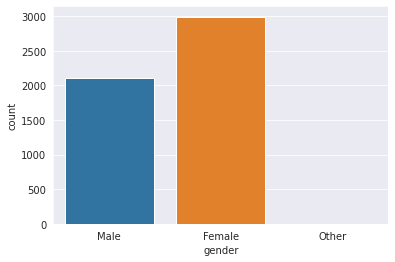

In [16]:
sns.set_style('darkgrid')
sns.countplot(data = df, x = 'gender')

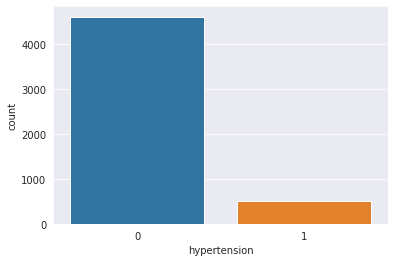

In [17]:
sns.countplot(data = df, x = 'hypertension')

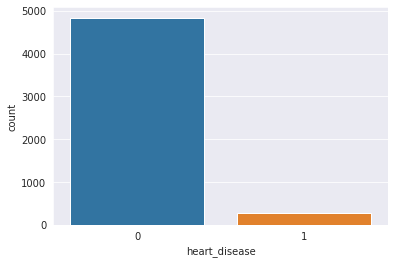

In [18]:
sns.countplot(data = df, x = 'heart_disease')

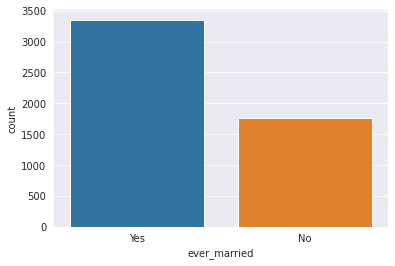

In [19]:
sns.countplot(data = df, x = 'ever_married')

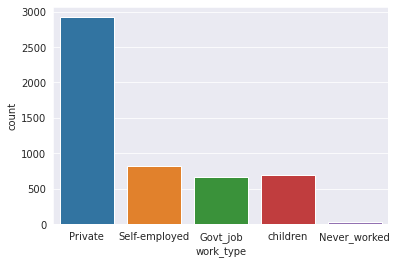

In [20]:
sns.countplot(data = df, x = 'work_type')

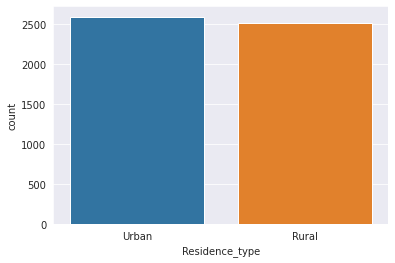

In [21]:
sns.countplot(data = df, x = 'Residence_type')

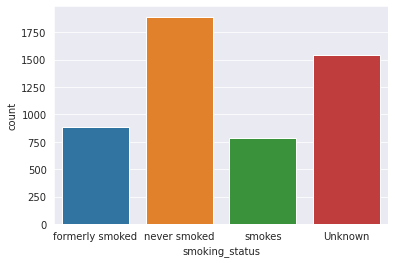

In [22]:
sns.countplot(data = df, x = 'smoking_status')

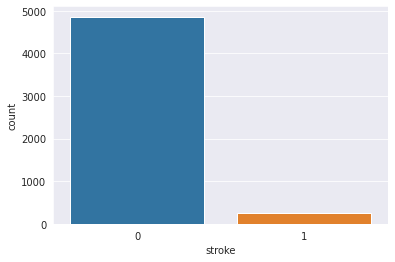

In [23]:
sns.countplot(data = df, x = 'stroke')

Data is highly imbalanced

## Distribution PLot

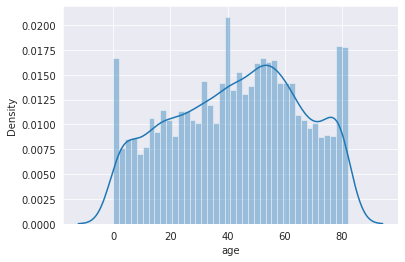

In [24]:
sns.distplot(df['age'], bins = 40)

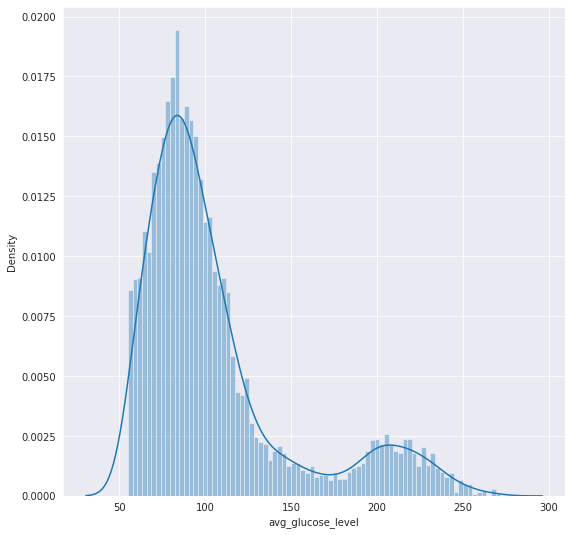

In [25]:
fig = plt.figure(figsize=(9, 9))
sns.distplot(df['avg_glucose_level'], bins = 80)

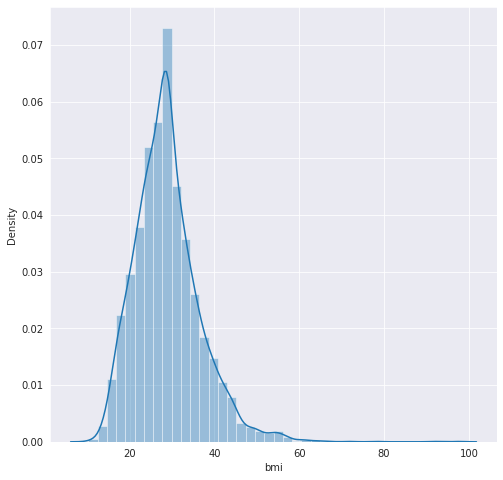

In [26]:
fig = plt.figure(figsize = (8,8))
sns.distplot(df['bmi'], bins = 40)

## Analyzing Continuous Variables

Text(0.5, 0.98, 'Density of Age, Glucose, and BMI by Stroke')

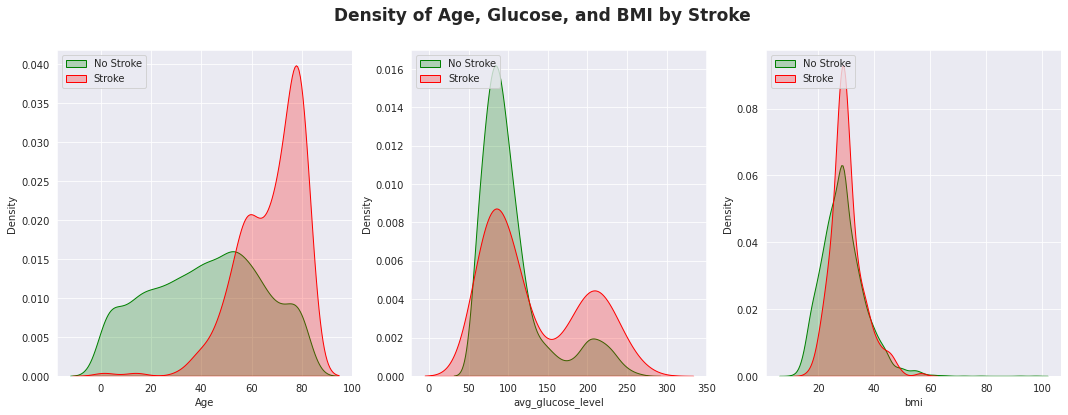

In [27]:
sns.set_style('darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))

sns.kdeplot(df['age'][df['stroke'] == 0], ax = ax1, shade = 'True', color = 'g')
sns.kdeplot(df['age'][df['stroke'] == 1], ax = ax1, shade = 'True', color = 'r')
ax1.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')

sns.kdeplot(df['avg_glucose_level'][df['stroke'] == 0], ax = ax2, shade = 'True', color = 'g')
sns.kdeplot(df['avg_glucose_level'][df['stroke'] == 1], ax = ax2, shade = 'True', color = 'r')
ax2.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax2.set_xlabel('avg_glucose_level')
ax2.set_ylabel('Density')

sns.kdeplot(df['bmi'][df['stroke'] == 0], ax = ax3, shade = 'True', color = 'g')
sns.kdeplot(df['bmi'][df['stroke'] == 1], ax = ax3, shade = 'True', color = 'r')
ax3.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax3.set_xlabel('bmi')
ax3.set_ylabel('Density')

plt.suptitle('Density of Age, Glucose, and BMI by Stroke', fontweight = 'bold', fontsize = 17)

## Analyzing Categorical Variables

Text(0.5, 0.98, 'Count of Gender, Hypertension, Heart Disease, Married, Work and Smoking Status by Stroke')

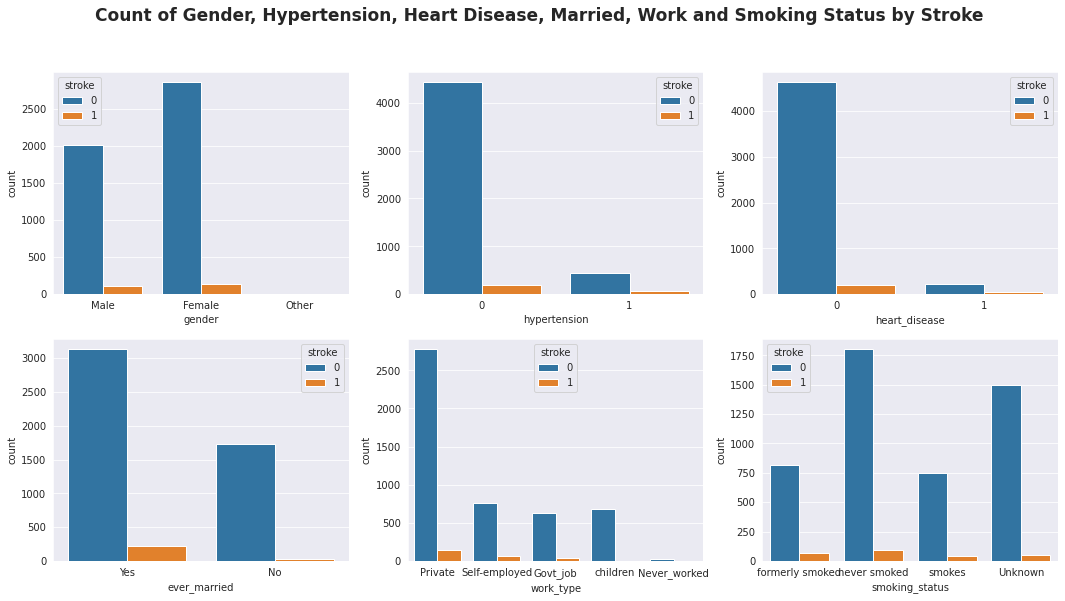

In [28]:

fig, axes = plt.subplots(2, 3, figsize = (18,9))

sns.countplot(data = df, x = 'gender', hue = 'stroke', ax = axes[0, 0])
sns.countplot(data = df, x = 'hypertension', hue = 'stroke',  ax = axes[0, 1])
sns.countplot(data = df, x = 'heart_disease', hue = 'stroke',  ax = axes[0, 2])
sns.countplot(data = df, x = 'ever_married', hue = 'stroke',  ax = axes[1, 0])
sns.countplot(data = df, x = 'work_type', hue = 'stroke', ax = axes[1, 1])
sns.countplot(data = df, x = 'smoking_status', hue = 'stroke',  ax = axes[1, 2])

plt.suptitle('Count of Gender, Hypertension, Heart Disease, Married, Work and Smoking Status by Stroke', fontsize = 17, fontweight = 'bold')

In [29]:
data_delete = df[df['gender'] == 'Other'].index
df = df.drop(data_delete)

## Encoding

In [30]:
df = df.astype({"gender": 'category', "ever_married":'category', "work_type":'category', "Residence_type": 'category', "smoking_status": 'category'})

In [31]:
df['gender'] = df[['gender']].apply(lambda x: x.cat.codes)
df['ever_married'] = df[['ever_married']].apply(lambda x: x.cat.codes)
df['work_type'] = df[['work_type']].apply(lambda x: x.cat.codes)
df['Residence_type'] = df[['Residence_type']].apply(lambda x: x.cat.codes)
df['smoking_status'] = df[['smoking_status']].apply(lambda x: x.cat.codes)

In [32]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


## Collinearity

In [33]:
df_num = df[['age', 'avg_glucose_level', 'bmi']]
corr = df_num.corr()
corr

,age,avg_glucose_level,bmi
age,1.000000,0.238323,0.325858
avg_glucose_level,0.238323,1.000000,0.168910
bmi,0.325858,0.168910,1.000000


### HeatMap of Numerical Features

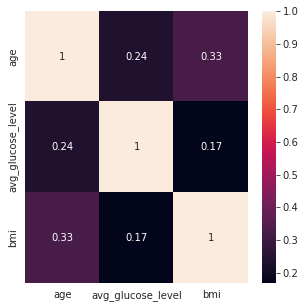

In [34]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(corr, ax = ax, annot = True)

In [35]:
x = df.drop(['stroke'], axis = 1)
y = df['stroke']

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

def feature_scaling(x):
    scaled_features = sc.fit_transform(x)
    x_df = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)
    return x_df

In [37]:
x = feature_scaling(x)

In [38]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.189791,1.051242,-0.328637,4.184599,0.723678,-0.153852,0.983884,2.706450,1.001041,-0.351819
1,-0.840484,0.785889,-0.328637,-0.238972,0.723678,0.763335,-1.016380,2.121652,-0.000165,0.581434
2,1.189791,1.626174,-0.328637,4.184599,0.723678,-0.153852,-1.016380,-0.004867,0.468399,0.581434
3,-0.840484,0.255182,-0.328637,-0.238972,0.723678,-0.153852,0.983884,1.437473,0.715233,1.514687
4,-0.840484,1.581949,3.042866,-0.238972,0.723678,0.763335,-1.016380,1.501297,-0.635858,0.581434
...,...,...,...,...,...,...,...,...,...,...
5105,-0.840484,1.626174,3.042866,-0.238972,0.723678,-0.153852,0.983884,-0.494481,-0.000165,0.581434
5106,-0.840484,1.670400,-0.328637,-0.238972,0.723678,0.763335,0.983884,0.420922,1.442744,0.581434
5107,-0.840484,-0.363976,-0.328637,-0.238972,0.723678,0.763335,-1.016380,-0.511266,0.221565,0.581434
5108,1.189791,0.343633,-0.328637,-0.238972,0.723678,-0.153852,-1.016380,1.328375,-0.427998,-0.351819


## Handling imbalance data using SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

def SMOTE(x, y):
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    x, y = sm.fit_resample(x, y.ravel())

    print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y==0)))
    return x, y

In [40]:
x, y = SMOTE(x, y)

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4860 

After OverSampling, counts of label '1': 4860
After OverSampling, counts of label '0': 4860


## Splitting the data

In [41]:
from sklearn.model_selection import train_test_split
def splitting_data(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25, random_state = 0)
    return xtrain, xtest, ytrain, ytest

In [42]:
xtrain, xtest, ytrain, ytest = splitting_data(x, y)

# Prediction

## Models

In [43]:
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [44]:
models = []

models.append(['Logistic Regression', LogisticRegression(random_state=0)])
# models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XG Boost', xgb.XGBClassifier(n_estimators= 500, learning_rate = 0.1, eval_metric = "logloss", random_state=0)])

#### Analysis of score and evaluation metrics

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score, KFold

In [46]:
def analyze(models, xtrain, ytrain, xtest, ytest,x, y, feature_importance_include = True):
    for m in range(len(models)):
        model = models[m][1]

        #training the model
        model.fit(xtrain, ytrain)

        #test score and training score
        testing_score = model.score(xtest, ytest)
        training_score = model.score(xtrain, ytrain)

        #K-Fold cross validation mea accuracy
        kfold = KFold(n_splits = 10, random_state = 0, shuffle=True)
        kfold_accuracy = cross_val_score(model, x, y, cv = kfold, scoring = 'accuracy')
        kfold_mean_accuracy = kfold_accuracy.mean()
        std = kfold_accuracy.std()

        ypred = model.predict(xtest)
        
#       f1-score
        f1 = f1_score(ytest, ypred)

        #Confusion Matrix
        cm = confusion_matrix(ytest, ypred)

        #Classification Report
        cr = classification_report(ytest, ypred)

        #Features Importances
        if(feature_importance_include):
            if(models[m][0] == 'Logistic Regression'):
                pass
            else:
                feature_imp = pd.Series(model.feature_importances_*100, index=x.columns).sort_values(ascending=False)
        
#         lst.append([testing_score, kfold_mean_accuracy, std, f1])

        #Printing the values and plotting the graph
        print(models[m][0] + ': ' )
        print()
        print('Training score => ' + str(training_score))
        print('K-Fold Mean Accuracy => ' + str(kfold_mean_accuracy))
        print('Standard Deviation in kfold => ' + str(std))
        print('Testing score =>' + str(testing_score))
        print()
        print(cm)
        print()
        print(cr)
        print()
        if(feature_importance_include):
            if(models[m][0] == 'Logistic Regression'):
                pass
            else:
                sns.barplot(x = feature_imp, y = feature_imp.index)
                plt.xlabel("Features Importance")
                plt.ylabel("Features")
                plt.show()
                print()
        print('*'*90)
#     return lst

Logistic Regression: 

Training score => 0.7838134430727023
K-Fold Mean Accuracy => 0.7815843621399177
Standard Deviation in kfold => 0.012465553139441032
Testing score =>0.7765432098765432

[[901 311]
 [232 986]]

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1212
           1       0.76      0.81      0.78      1218

    accuracy                           0.78      2430
   macro avg       0.78      0.78      0.78      2430
weighted avg       0.78      0.78      0.78      2430


******************************************************************************************
Random Forest: 

Training score => 1.0
K-Fold Mean Accuracy => 0.963477366255144
Standard Deviation in kfold => 0.006362817323484046
Testing score =>0.9588477366255144

[[1157   55]
 [  45 1173]]

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1212
           1       0.96      0.96      0.96      1218

    a

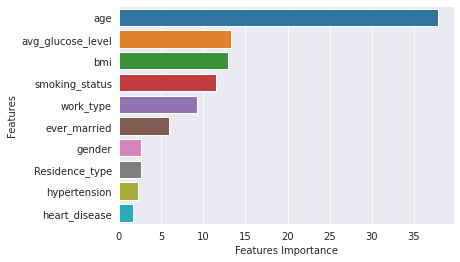


******************************************************************************************
XG Boost: 

Training score => 0.972153635116598
K-Fold Mean Accuracy => 0.9566872427983538
Standard Deviation in kfold => 0.007580426757114662
Testing score =>0.9547325102880658

[[1187   25]
 [  85 1133]]

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1212
           1       0.98      0.93      0.95      1218

    accuracy                           0.95      2430
   macro avg       0.96      0.95      0.95      2430
weighted avg       0.96      0.95      0.95      2430




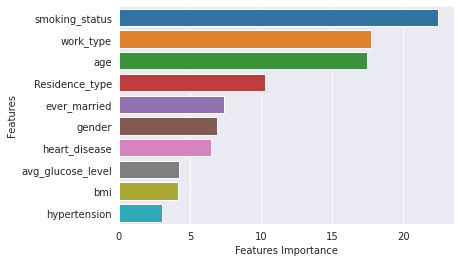


******************************************************************************************


In [47]:
# lst_before = []
# lst_before = analyze(models, xtrain, ytrain, xtest, ytest, x, y, lst_before)
analyze(models, xtrain, ytrain, xtest, ytest, x, y)

## Tuning the Models

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_models = [(RandomForestClassifier(),[{'n_estimators': list(range(400, 501, 20)),'criterion':['gini','entropy'],'random_state':[0]}]),
                (xgb.XGBClassifier(eval_metric = "logloss"), [{'n_estimators': list(range(300, 701, 50)), 'max_depth': [4, 5, 6], 'learning_rate': [0.1, .001, 0.2, .05, .25], 'random_state':[0]}])]

In [50]:
for i,j in grid_models:
    grid = GridSearchCV(estimator = i, param_grid = j, scoring = 'accuracy', cv = 10)
    grid.fit(xtrain, ytrain)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

RandomForestClassifier():
Best Accuracy : 95.75%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 420, 'random_state': 0}

----------------

XGBClassifier(eval_metric='logloss'):
Best Accuracy : 96.24%
Best Parameters :  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 600, 'random_state': 0}

----------------



Based on above evaluations and results we will take XGB Classifier Model

In [54]:
model_best_from_view = xgb.XGBClassifier(n_estimators = 600, learning_rate= 0.2, max_depth= 5, reg_alpha=0.005,eval_metric = 'logloss', random_state = 0).fit(xtrain, ytrain)

In [55]:
print("Score => " + str(round(model_best_from_view.score(xtest, ytest)*100, 2)) + '%')

Score => 96.21%


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1212
           1       0.97      0.95      0.96      1218

    accuracy                           0.96      2430
   macro avg       0.96      0.96      0.96      2430
weighted avg       0.96      0.96      0.96      2430



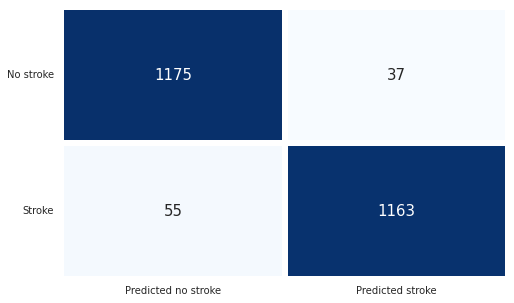

In [56]:
ypred = model_best_from_view.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(classification_report(ytest, ypred))

plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

Final model is using XGBClassifier() with an accuracy of 96.13% and f1-score = 0.96